In [1]:
# Import important packages
%matplotlib inline
from scipy import io
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from scipy import io, signal 

In [2]:
# This function returns the power and frequencies from signal. We got this from HW3
def compute_pwsp(sig, fs):
    pwsp = np.abs(np.fft.fft(sig))**2 
    freqs = np.fft.fftfreq(len(sig),d=1/fs)
    return pwsp, freqs

# This function we obtained from homework3. We changed it to only plot the plots we care about and return the 
# Analytical Signal.
def getanalytical(sig,cutoff,pass_zero,cutoff2="Onlyone"):
    """
    define filter, plot filter impulse response and filter the original signal
    """
    if cutoff2 == "Onlyone":
        filt_order = int(3*fs/cutoff)+1
        filt_coefs = signal.firwin(filt_order, cutoff=cutoff, fs=fs, pass_zero=pass_zero)
    else:
        filt_order = int(3*fs/(cutoff2-cutoff))+1
        filt_coefs = signal.firwin(filt_order, cutoff=(cutoff,cutoff2), fs=fs, pass_zero=pass_zero)       
        
    freq_resp = np.fft.fft(filt_coefs, n=int(fs))
    mag_resp = abs(freq_resp)**2
    ph_resp = np.angle(freq_resp)
    freqs = np.fft.fftfreq(int(fs),1/fs)
    
    plt.figure(figsize=(15,4))
    lfp_filt = np.convolve(sig, filt_coefs, mode='same')
    plt.plot(time, sig, alpha=0.8, label='Original')
    plt.plot(time, lfp_filt, alpha=0.8, label='Filtered')
    plt.xlim([0,5])
    plt.legend()
    plt.title('Wave Comparison')
    plt.xlabel('Time(s)');plt.ylabel('Voltage (V)')

    plt.figure(figsize=(15,4))
    pwsp, freqs_win = compute_pwsp(sig, fs)
    pwsp_s, _ = compute_pwsp(lfp_filt, fs)
    plt.plot(freqs_win, pwsp, alpha=0.8, label='Original')
    plt.plot(freqs_win, pwsp_s, alpha=0.8, label='Filtered')
    plt.xlim([-25,25])
    plt.legend()
    plt.title('Power Spectrum Comparison')
    plt.xlabel('Frequency (Hz))');plt.ylabel('Power')
    return(lfp_filt)

# This function Richard Gao provided to us, and we just copied but without the comments
def plot_spectrogram(spg, t, f, freq_lims=[0,100], plot_db=False):
    plt.figure(figsize=(15,4))
    if plot_db:
        plt.imshow(10*np.log10(spg), aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    else:
        plt.imshow(spg, aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    plt.xlabel('Time'); plt.ylabel('Log10 Frequency(Hz)');
    plt.ylim(freq_lims)
    plt.colorbar()
    plt.tight_layout()

In [3]:
# Load dataset and display layout
data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jul 24 20:09:57 2019',
 '__version__': '1.0',
 '__globals__': [],
 'ecog_anes': array([[  68,   66,   76, ...,   39,   39,   31],
        [-634, -627, -618, ..., -893, -869, -868],
        [-283, -280, -260, ...,  -96,  -73,  -95]], dtype=int16),
 'ecog_eyesclosed': array([[ 207,  201,  205, ...,   29,   39,   30],
        [ -32,   10,   26, ..., -195, -187, -180],
        [ -59,  -64,  -98, ...,  -32,  -29,    3]], dtype=int16),
 'ecog_eyesopen': array([[ -17,  -28,  -33, ...,  -59,  -70,  -76],
        [-117, -118, -100, ..., -132, -143, -143],
        [-792, -826, -875, ..., -524, -495, -427]], dtype=int16),
 'elec_num': array([52, 70, 91], dtype=uint8),
 'fs': 1000,
 'labels': array(['cingulate', 'occipital', 'temporal'], dtype=object)}

In [4]:
# Here we Extract important variables that we will use for our analysis. 
anes = data['ecog_anes'][1]
eyesclosed = data['ecog_eyesclosed'][1]
eyesopen = data['ecog_eyesopen'][1]
fs = data['fs']
time = np.arange(0,len(anes)/fs,1/fs)

In [5]:
# Extracting data for awake
opencing = data['ecog_eyesopen'][0]
openocci = data['ecog_eyesopen'][1]
opentemp = data['ecog_eyesopen'][2]
# Extracting data for eyes closed
closedcing = data['ecog_eyesclosed'][0]
closedocci = data['ecog_eyesclosed'][1]
closedtemp = data['ecog_eyesclosed'][2]
# Extracting data for anesthesized
anescing = data['ecog_anes'][0]
anesocci = data['ecog_anes'][1]
anestemp = data['ecog_anes'][2]

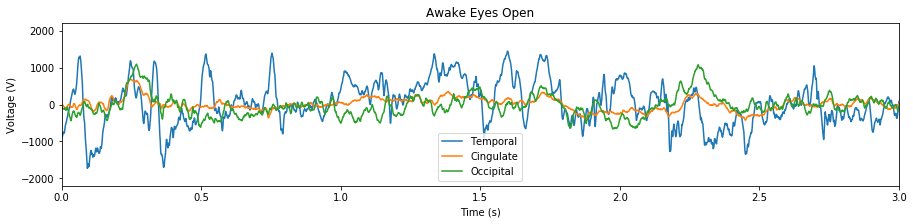

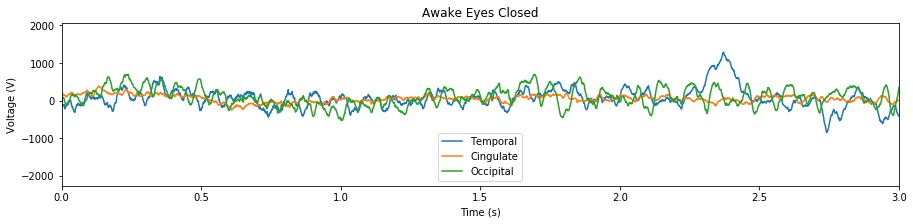

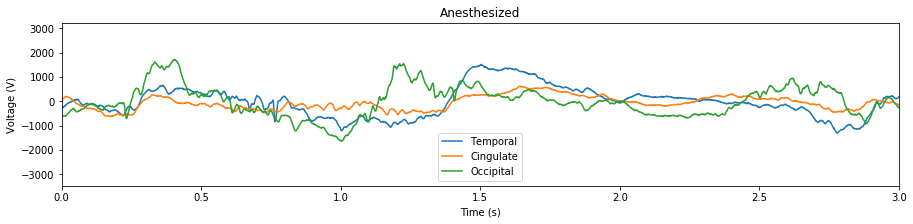

In [6]:
# Plotting awake eyes open data
plt.figure(figsize=(15,3))
plt.plot(time,opentemp,label="Temporal")
plt.plot(time,opencing,label="Cingulate")
plt.plot(time,openocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Awake Eyes Open')
plt.legend(loc='lower center')

# Plotting awake eyes closed data
plt.figure(figsize=(15,3))
plt.plot(time,closedtemp,label="Temporal")
plt.plot(time,closedcing,label="Cingulate")
plt.plot(time,closedocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Awake Eyes Closed')
plt.legend(loc='lower center')

# Plotting anesthesized data
plt.figure(figsize=(15,3))
plt.plot(time,anestemp,label="Temporal")
plt.plot(time,anescing,label="Cingulate")
plt.plot(time,anesocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Anesthesized')
plt.legend(loc='lower center')

(0, 5)

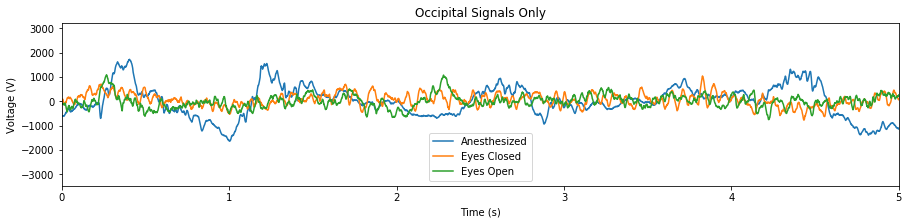

In [7]:
# Plotting occipital signals only
plt.figure(figsize=(15,3))
plt.plot(time,anes,label="Anesthesized")
plt.plot(time,eyesclosed,label="Eyes Closed")
plt.plot(time,eyesopen,label="Eyes Open")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.legend(loc='lower center')
plt.title('Occipital Signals Only')
plt.xlim([0,5])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


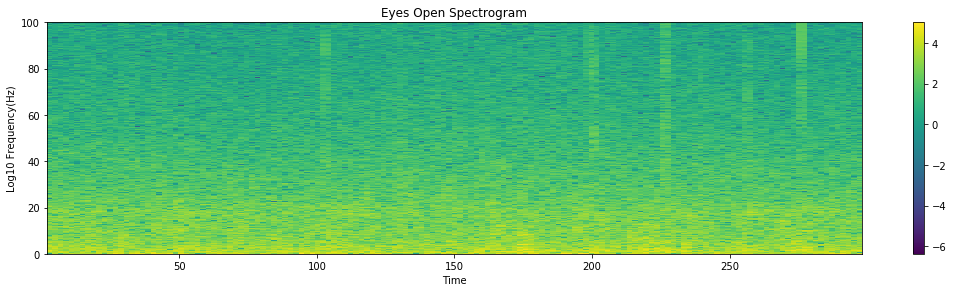

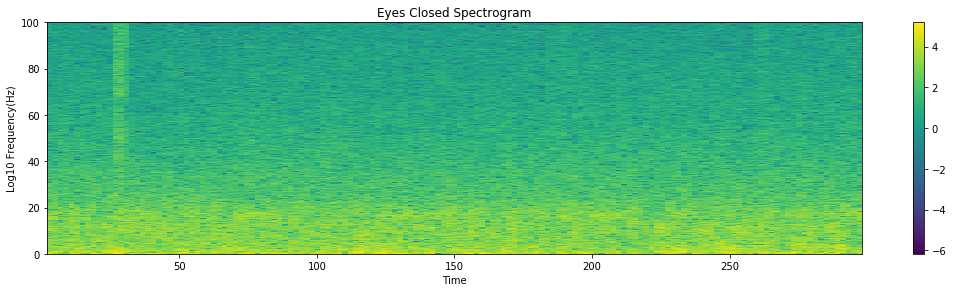

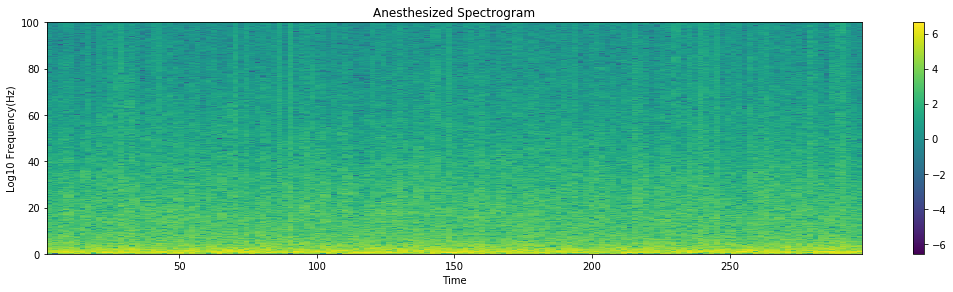

In [8]:
# We will use spectrogram to get the power spectrum of the signal by using singal.spectrogram (stft)
# We pick a window size of 4 because we found some low frequency (close to 1) in our first pass, so we want to 
# Make sure we capture all low frequencies. Since we think these frequencies should be present and not 
# changing quickly, we are okay giving away some temporal resolution
len_win=4
len_overlap=2
f_sp, t_sp, open_sp = signal.spectrogram(eyesopen, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(np.log10(open_sp), t_sp, f_sp, freq_lims=[0,100], plot_db=False)
plt.title('Eyes Open Spectrogram');
f_sp, t_sp, closed_sp = signal.spectrogram(eyesclosed, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(np.log10(closed_sp), t_sp, f_sp, freq_lims=[0,100], plot_db=False)
plt.title('Eyes Closed Spectrogram');
f_sp, t_sp, anes_sp = signal.spectrogram(anes, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(np.log10(anes_sp), t_sp, f_sp, freq_lims=[0,100], plot_db=False)
plt.title('Anesthesized Spectrogram');

Eyes Open: 203026.015625
Eyes Closed: 234664.28125
Anesthesized: 2996113.25


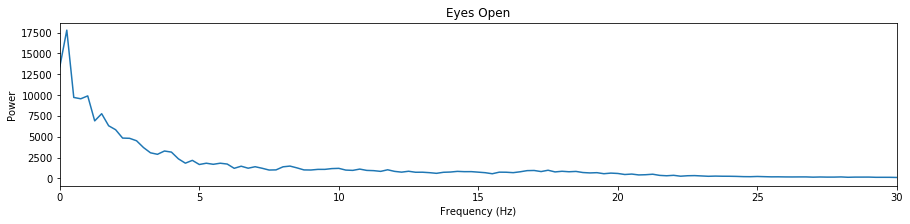

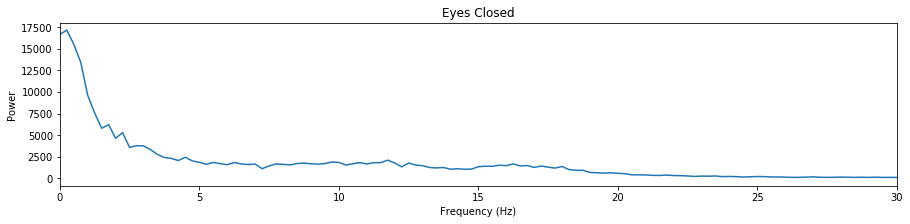

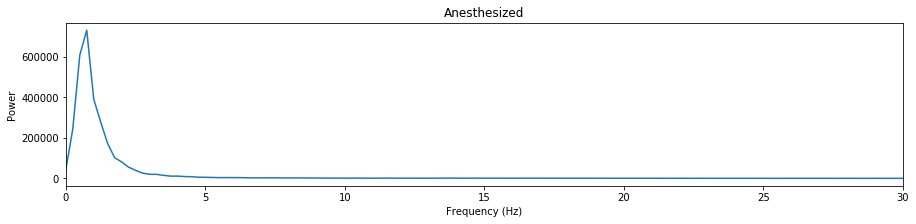

In [9]:
# Anesthesized has a lot more power.
spg_anes = np.mean(anes_sp,axis=1)
spg_open = np.mean(open_sp,axis=1)
spg_closed = np.mean(closed_sp,axis=1)

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_open,label="Eyes Open")
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Eyes Open')
plt.xlim([0,30]);


plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_closed)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Eyes Closed')
plt.xlim([0,30]);

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_anes)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Anesthesized')
plt.xlim([0,30]);
print('Eyes Open: {}'.format(np.sum(spg_open)))
print('Eyes Closed: {}'.format(np.sum(spg_closed)))
print('Anesthesized: {}'.format(np.sum(spg_anes)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Eyes Open: -713.0614624023438
Eyes Closed: -920.2694091796875
Anesthesized: -535.0897216796875


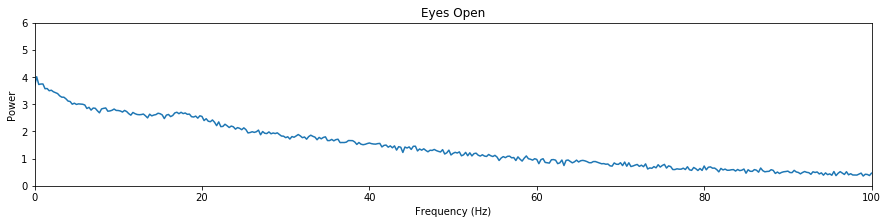

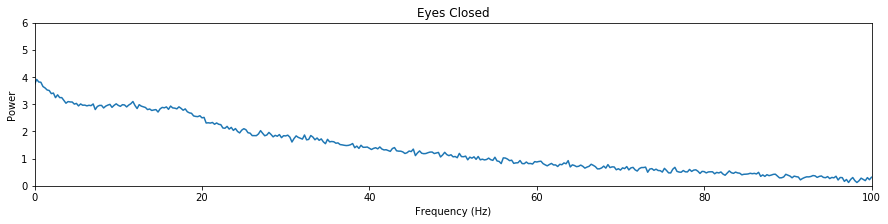

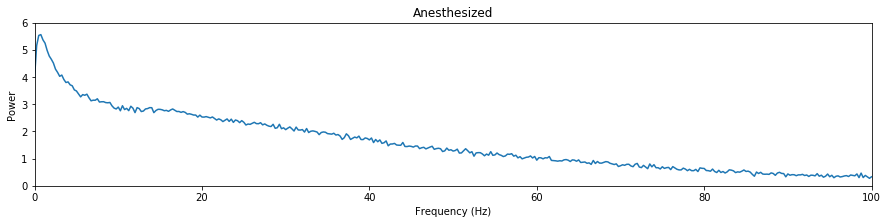

In [10]:
# Anesthesized has a lot more power.
spg_anes = np.mean(np.log10(anes_sp),axis=1)
spg_open = np.mean(np.log10(open_sp),axis=1)
spg_closed = np.mean(np.log10(closed_sp),axis=1)

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_open,label="Eyes Open")
plt.xlabel("Frequency (Hz)"); plt.ylabel("Log Power")
plt.title('Eyes Open')
plt.xlim([0,100]); plt.ylim([0,6])


plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_closed)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Log Power")
plt.title('Eyes Closed')
plt.xlim([0,100]); plt.ylim([0,6])

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_anes)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Log Power")
plt.title('Anesthesized')
plt.xlim([0,100]); plt.ylim([0,6])
print('Eyes Open: {}'.format(np.sum(spg_open)))
print('Eyes Closed: {}'.format(np.sum(spg_closed)))
print('Anesthesized: {}'.format(np.sum(spg_anes[spg_anes!= -inf])))

Eyes Open: 0.7994051322999154


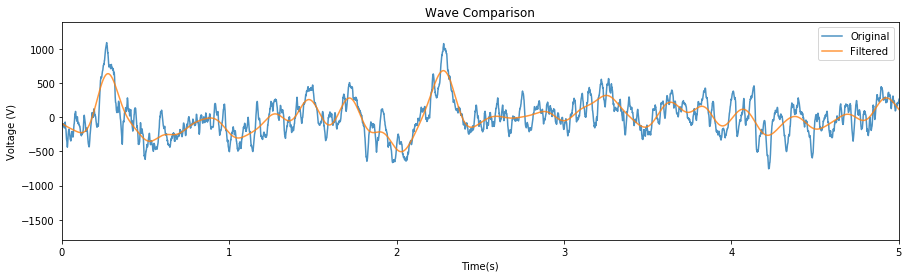

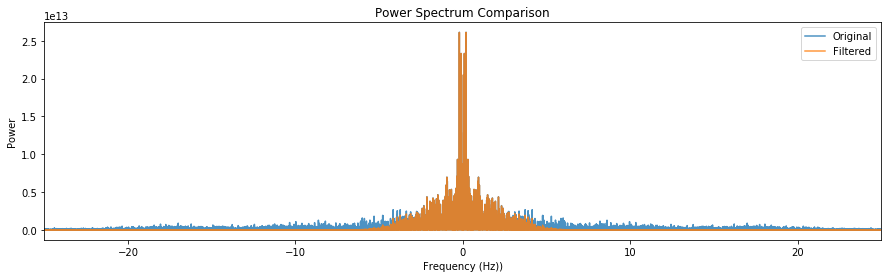

In [11]:
cutoff = 5
pass_zero=True
open_filt = getanalytical(eyesopen,cutoff=cutoff,pass_zero=pass_zero)
print('Eyes Open: {}'.format(np.corrcoef(eyesopen,open_filt)[1,0]))

Eyes Closed: 0.7612227198823485


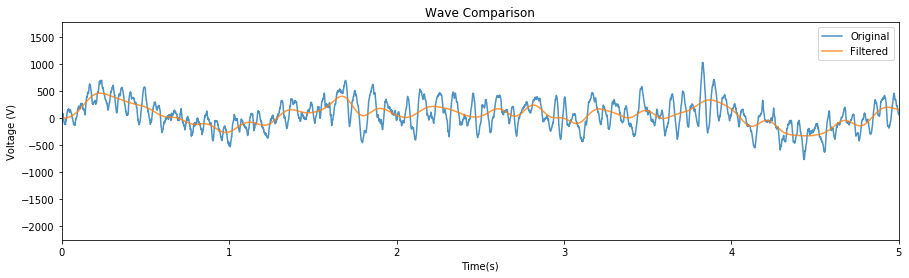

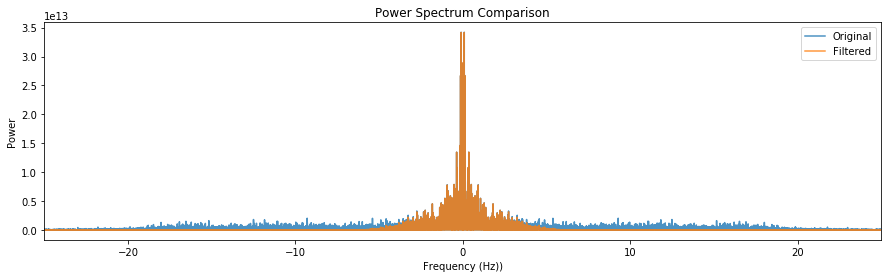

In [12]:
cutoff = 5
closed_filt = getanalytical(eyesclosed,cutoff=cutoff,pass_zero=pass_zero)
print('Eyes Closed: {}'.format(np.corrcoef(eyesclosed,closed_filt)[1,0]))

Anesthesized: 0.9701158134237569


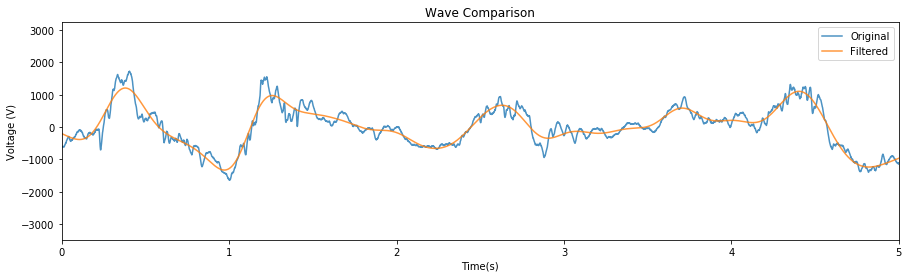

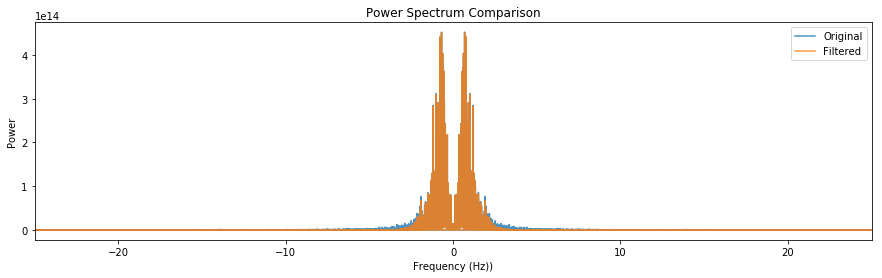

In [13]:
cutoff = 3
anes_filt = getanalytical(anes,cutoff=cutoff,pass_zero=pass_zero)
print('Anesthesized: {}'.format(np.corrcoef(anes,anes_filt)[1,0]))

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


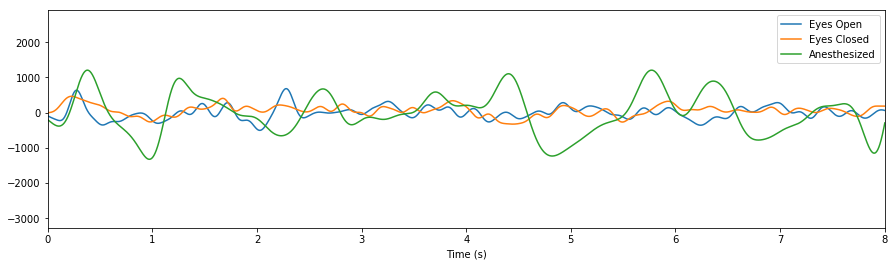

In [14]:
# Now we get the Analytical signal after filtering it and plot it.
hil_aneso = signal.hilbert(anes_filt)
hil_openo = signal.hilbert(open_filt)
hil_closedo = signal.hilbert(closed_filt)
plt.figure(figsize=(15,4))
plt.plot(time,hil_openo,label='Eyes Open')
plt.plot(time,hil_closedo,label='Eyes Closed')
plt.plot(time,hil_aneso,label='Anesthesized')
plt.xlim([0,8])
plt.xlabel("Time (s)")
plt.legend()

Eyes Open: 0.8598861941123473
Eyes Open: 0.7643437703543698


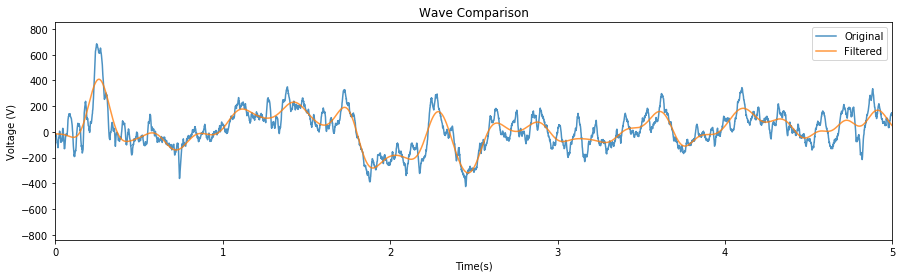

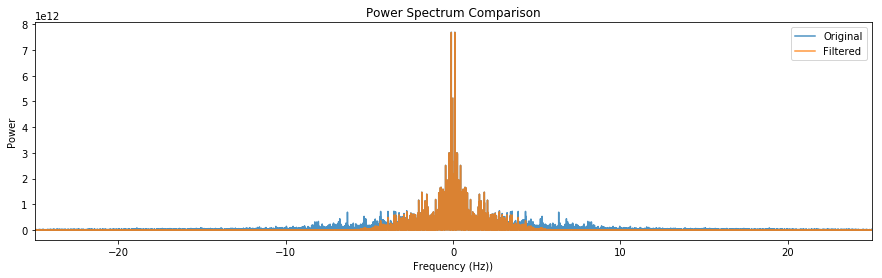

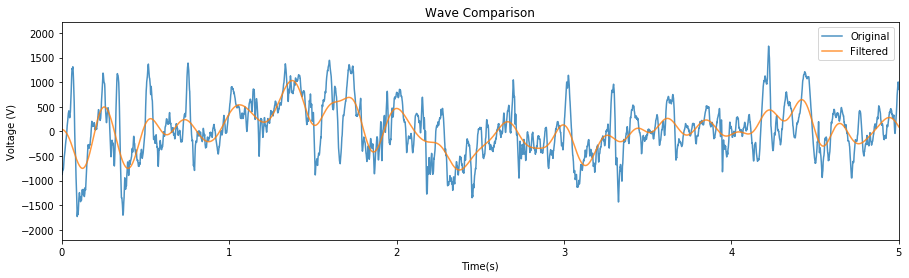

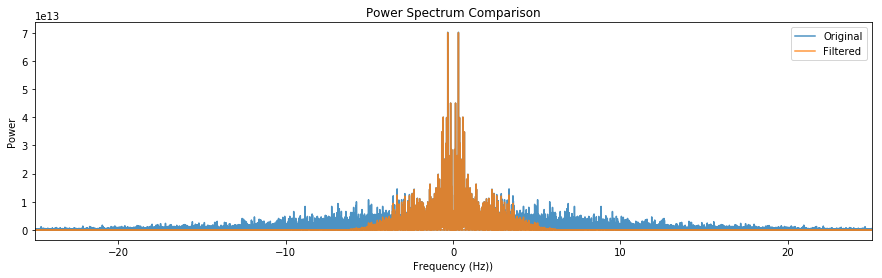

In [15]:
# Get analytical signals for the rest of them
# Eyes Open
cutoff=5
open_filtc = getanalytical(opencing,cutoff=cutoff,pass_zero=pass_zero)
hil_openc = signal.hilbert(open_filtc)
open_filtt = getanalytical(opentemp,cutoff=cutoff,pass_zero=pass_zero)
hil_opent = signal.hilbert(open_filtt)
print('Eyes Open: {}'.format(np.corrcoef(opencing,open_filtc)[1,0]))
print('Eyes Open: {}'.format(np.corrcoef(opentemp,open_filtt)[1,0]))

Eyes Closed: 0.8524291968589742
Eyes Closed: 0.8076831225771941


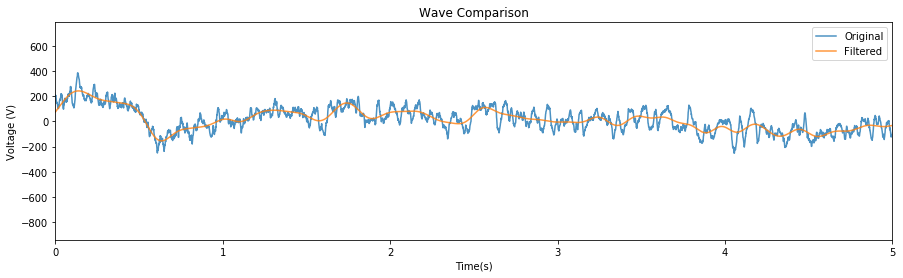

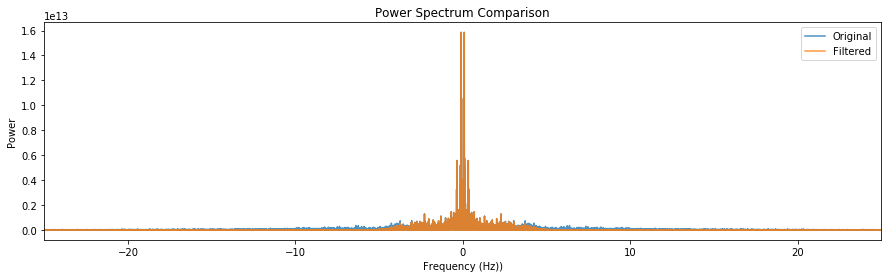

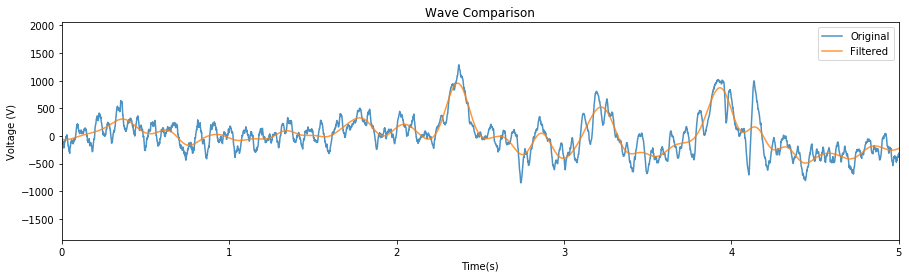

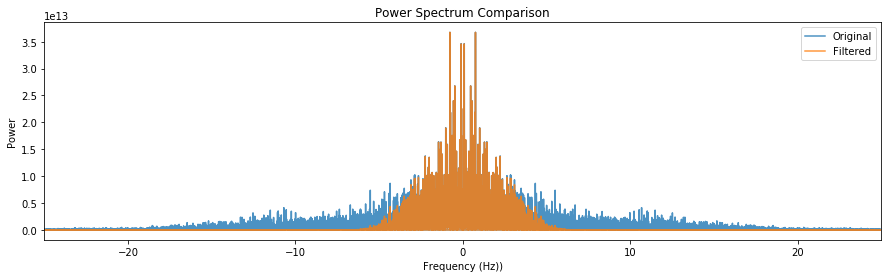

In [16]:
# Eyes Closed
cutoff=5
closed_filtc = getanalytical(closedcing,cutoff=cutoff,pass_zero=pass_zero)
hil_closedc = signal.hilbert(closed_filtc)
closed_filtt = getanalytical(closedtemp,cutoff=cutoff,pass_zero=pass_zero)
hil_closedt = signal.hilbert(closed_filtt)
print('Eyes Closed: {}'.format(np.corrcoef(closedcing,closed_filtc)[1,0]))
print('Eyes Closed: {}'.format(np.corrcoef(closedtemp,closed_filtt)[1,0]))

Anesthesized: 0.972724185560933
Anesthesized: 0.9552351307669186


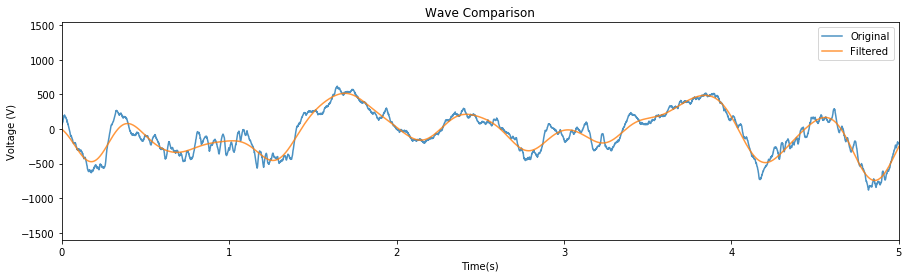

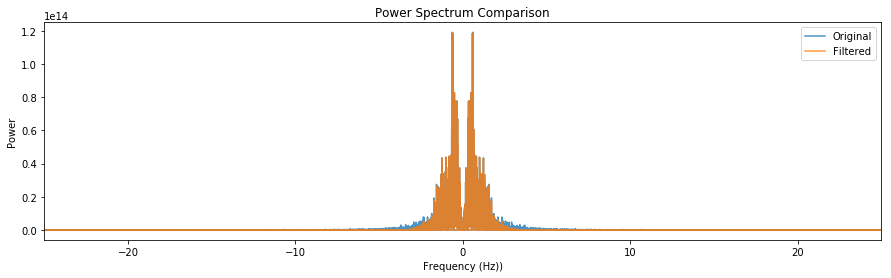

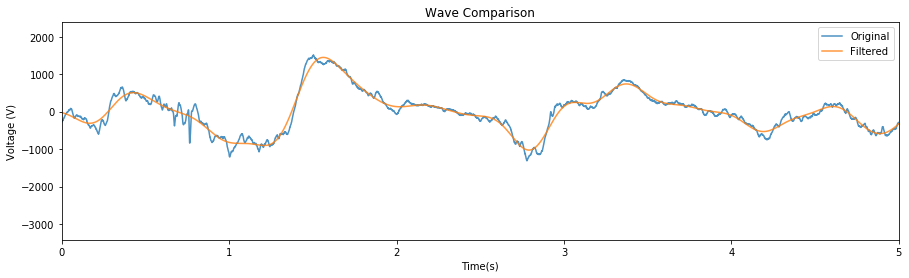

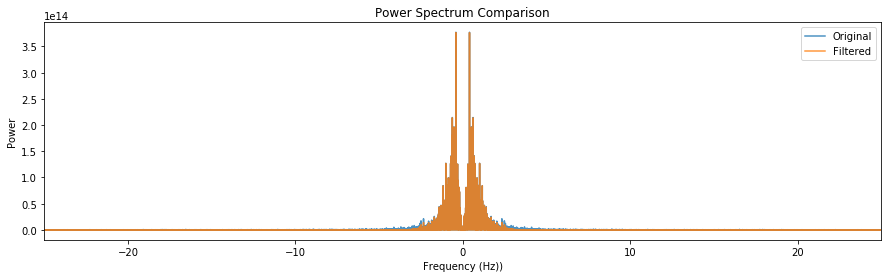

In [17]:
# Anesthesized
cutoff=3
anes_filtc = getanalytical(anescing,cutoff=cutoff,pass_zero=pass_zero)
hil_anesc = signal.hilbert(anes_filtc)
anes_filtt = getanalytical(anestemp,cutoff=cutoff,pass_zero=pass_zero)
hil_anest = signal.hilbert(anes_filtt)
print('Anesthesized: {}'.format(np.corrcoef(anescing,anes_filtc)[1,0]))
print('Anesthesized: {}'.format(np.corrcoef(anestemp,anes_filtt)[1,0]))

Text(0.5, 1.0, 'Eyes Open Temp vs Occi')

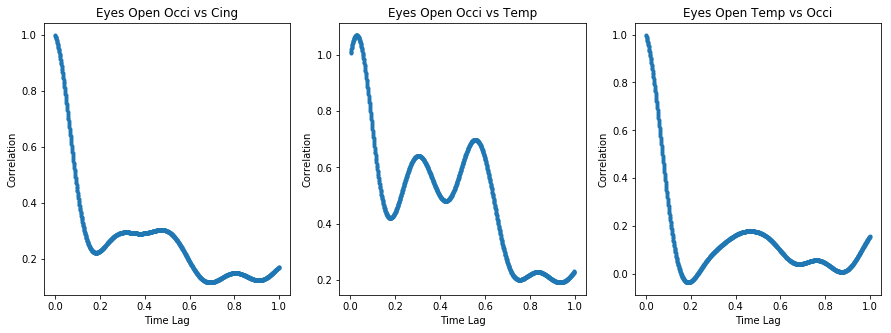

In [26]:
def xcorr(data1, data2, maxlag=100, zero_center=False):
    acf = np.zeros(maxlag)
    acf[0] = np.correlate(data1,data2)
    for lag in range(1,maxlag):
        acf[lag] = np.correlate(data1[:-lag],data2[lag:])
    acf /= acf[0]
    if zero_center: acf[0]=np.nan
    return acf

plt.figure(figsize=(15,5))
maxlag=int(fs)
t_ac = np.arange(0,maxlag/fs,1/fs)
plt.subplot(1,3,1)
plt.plot(t_ac, xcorr(hil_openo.real,hil_openc.real, maxlag, True), '.')
plt.ylabel("Correlation");plt.xlabel("Time Lag")
plt.title('Eyes Open Occi vs Cing')
plt.subplot(1,3,2)
plt.plot(t_ac, xcorr(hil_openc.real, hil_opent.real, maxlag, True), '.')
plt.ylabel("Correlation");plt.xlabel("Time Lag")
plt.title('Eyes Open Occi vs Temp')
plt.subplot(1,3,3)
plt.plot(t_ac, xcorr(hil_opent.real, hil_openo.real, maxlag, True), '.') 
plt.ylabel("Correlation");plt.xlabel("Time Lag")
plt.title('Eyes Open Temp vs Occi')


Text(0.5, 1.0, 'Eyes Closed Temp vs Occi')

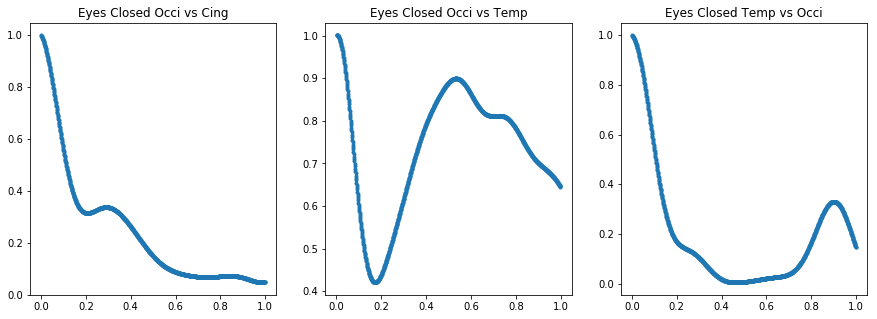

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t_ac, xcorr(hil_closedo.real,hil_closedc.real, maxlag, True), '.')
plt.title('Eyes Closed Occi vs Cing')
plt.subplot(1,3,2)
plt.plot(t_ac, xcorr(hil_closedc.real, hil_closedt.real, maxlag, True), '.')
plt.title('Eyes Closed Occi vs Temp')
plt.subplot(1,3,3)
plt.plot(t_ac, xcorr(hil_closedt.real, hil_closedo.real, maxlag, True), '.') 
plt.title('Eyes Closed Temp vs Occi')

Text(0.5, 1.0, 'Anesthesized Temp vs Occi')

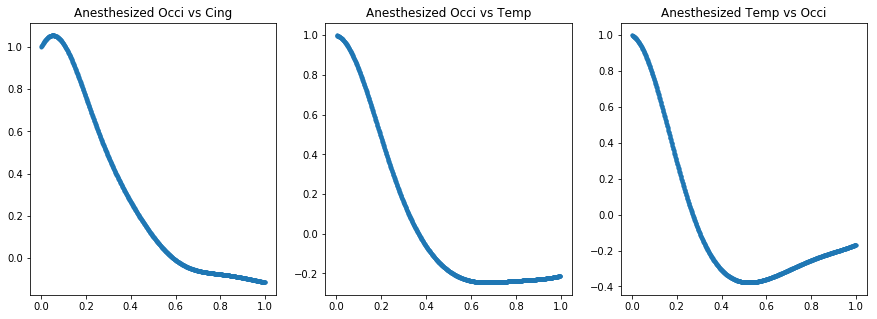

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t_ac, xcorr(hil_aneso.real,hil_anesc.real, maxlag, True), '.')
plt.title('Anesthesized Occi vs Cing')
plt.subplot(1,3,2)
plt.plot(t_ac, xcorr(hil_anesc.real, hil_anest.real, maxlag, True), '.')
plt.title('Anesthesized Occi vs Temp')
plt.subplot(1,3,3)
plt.plot(t_ac, xcorr(hil_anest.real, hil_aneso.real, maxlag, True), '.') 
plt.title('Anesthesized Temp vs Occi')

Text(0.5, 0, 'Time Lag')

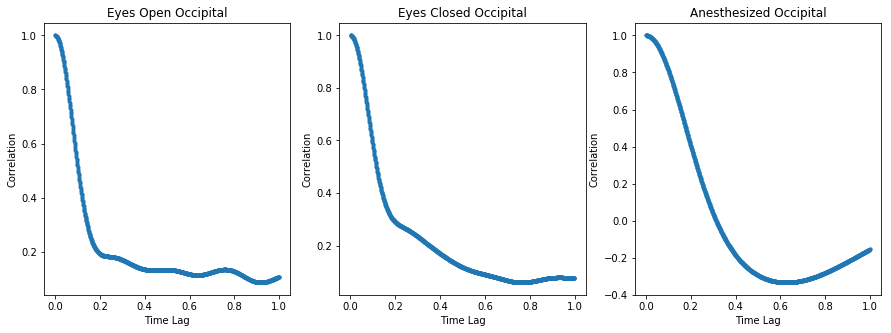

In [28]:
# Plotting the three occipital both real and imag together
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t_ac, xcorr(hil_openo.real, hil_openo.real, maxlag, True), '.') 
plt.title('Eyes Open Occipital')
plt.ylabel("Correlation");plt.xlabel("Time Lag")
plt.subplot(1,3,2)
plt.plot(t_ac, xcorr(hil_closedo.real, hil_closedo.real, maxlag, True), '.')
plt.title('Eyes Closed Occipital')
plt.ylabel("Correlation");plt.xlabel("Time Lag")
plt.subplot(1,3,3)
plt.plot(t_ac, xcorr(hil_aneso.real,hil_aneso.real, maxlag, True), '.')
plt.title('Anesthesized Occipital')
plt.ylabel("Correlation");plt.xlabel("Time Lag")

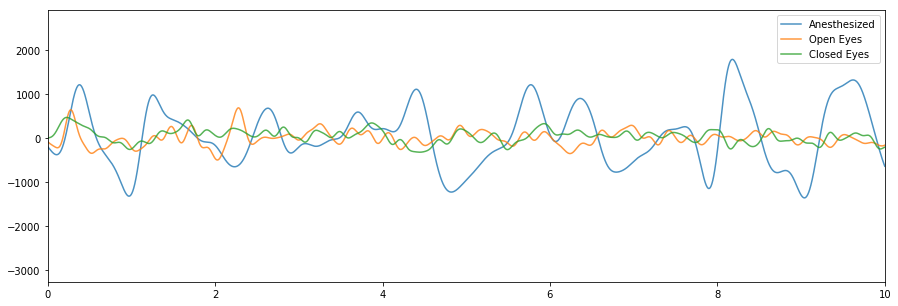

In [22]:
# Plotting the three occipital both real and imag together
plt.figure(figsize=(15,5))
plt.plot(time,hil_aneso.real, alpha=0.8, label='Anesthesized')
plt.plot(time,hil_openo.real, alpha=0.8, label='Open Eyes')
plt.plot(time,hil_closedo.real, alpha=0.8, label='Closed Eyes')
plt.xlim([0,10])
plt.legend()



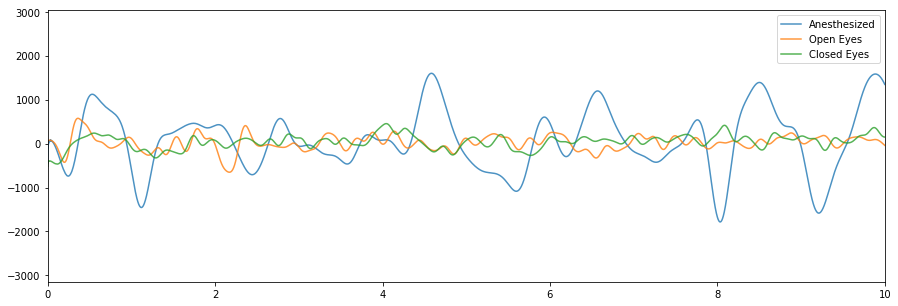

In [23]:
plt.figure(figsize=(15,5))
plt.plot(time,hil_aneso.imag, alpha=0.8, label='Anesthesized')
plt.plot(time,hil_openo.imag, alpha=0.8, label='Open Eyes')
plt.plot(time,hil_closedo.imag, alpha=0.8, label='Closed Eyes')
plt.xlim([0,10])
plt.legend()